### Dependencies

In [1]:
# import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [3]:
print("Tensorflow: ", tf.__version__, "\nNumpy: ", np.__version__)

Tensorflow:  2.18.0 
Numpy:  1.26.0


In [4]:
import tensorflow as tf

# Check if GPU is available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("GPU is available.")
else:
    print("GPU is not available.")

GPU is not available.


In [46]:
X, y = make_moons(n_samples=50000, noise=0.1, random_state=42)
data = pd.DataFrame(X, columns=['X_1', 'X_2'])
data["target"] = y
data.head()

,X_1,X_2,target
0,0.588823,-0.325708,1
1,0.288051,0.987467,0
2,0.871668,-0.005129,0
3,0.158318,1.059741,0
4,1.240127,-0.483309,1


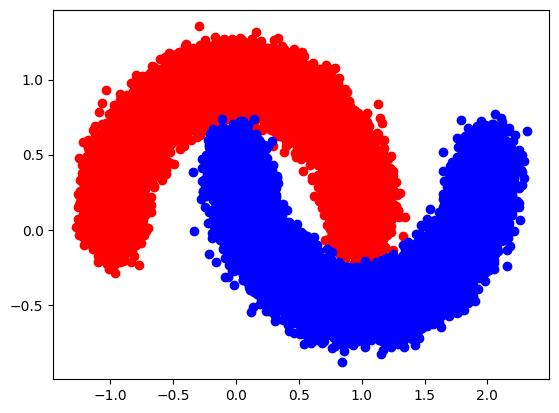

In [ ]:
plt.scatter(data[data["target"] == 0].X_1, data[data["target"] == 0].X_2, color="red", alpha=0.5);
plt.scatter(data[data["target"] == 1].X_1, data[data["target"] == 1].X_2, color="blue", alpha=0.5);

In [36]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=[2]),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(data[["X_1", "X_2"]], data["target"], epochs=1000)

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                         np.linspace(y_min, y_max, 1000))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=25)
    plt.xlabel("X_1")
    plt.ylabel("X_2")

Epoch 1/1000


c:\Users\Colea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5104 - loss: 0.8785   
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4880 - loss: 0.8287 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4275 - loss: 0.8219 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4914 - loss: 0.7926 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5206 - loss: 0.7642 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4957 - loss: 0.7649 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5452 - loss: 0.7357 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5900 - loss: 0.7144 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6011 - loss: 0.7008 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - loss: 0.6860 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 0.6751 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [44]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 519us/step


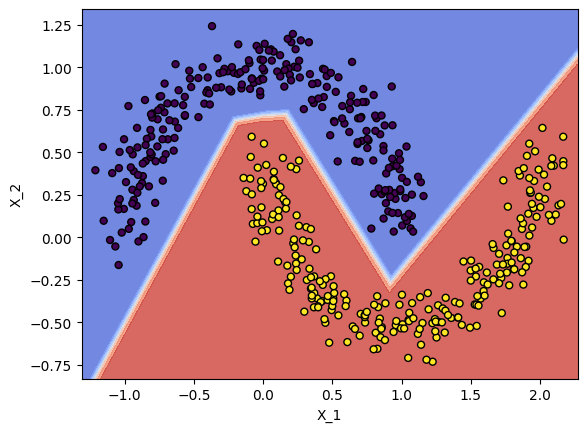

In [45]:
plot_decision_boundary(data[["X_1", "X_2"]].values, data["target"].values, model)